In [16]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt

In [153]:
"""
Read in original raw compiled csv data and convert to a list

:param path: full filepath to the csv
:return:     file converted to a list
"""
def csv_to_list(path):
    with open(path, 'r') as read_obj:
        csv_reader = reader(read_obj)
        # only reading in coordinates and b5/b6 values
        results = [[float(e) for e in row[:4]] + [float(b) for b in row[13:15]] for row in csv_reader]
    return results

In [166]:
"""
Create a 2d grid based on lat/lon coordinates

:param data: original list of coordinate/filter/band data
:return:     converted grid (2d list)
"""
def list_to_2d(data):
    # sort by min latitude then min longitude
    data = np.array(data)
    sort_indices = np.lexsort((data[:,0], data[:,1]))
    data_sorted = [data[i].tolist() for i in sort_indices]
    # print(len(data_sorted))
    
    # build a 2d grid using the coordinates
    prev_lat = data_sorted[0][1]
    two_dimensional = []
    row_builder = []
    for row in data_sorted:
        # print(len(row_builder))
        # print(len(row_builder))
        curr_lat = row[1]
        # if curr_lat > prev_lat:
        # if abs(curr_lat - prev_lat) > 0.001:
            two_dimensional.append(row_builder)
            row_builder = []
        row_builder.append(row)
        prev_lat = curr_lat

    two_dimensional.append(row_builder) # after the loop exits, add the last row to the grid
    
    return two_dimensional

In [19]:
"""
Get all the neighboring elements of a given element's position in a grid

:param grid: 2d grid as a list
:param x:    x coordinate of element (col)
:param y:    y coordinate of element (row)
:return:     list of neighboring elements
"""
def get_neighbors(grid, x, y):
    x_bound = len(grid[0]) - 1
    y_bound = len(grid) - 1
    
    if x > x_bound or y > y_bound or x < 0 or y < 0:
        return []
    
    n  = grid[y-1][x]   if (y > 0)                       else None
    ne = grid[y-1][x+1] if (y > 0 and x < x_bound)       else None
    e  = grid[y][x+1]   if (x < x_bound)                 else None
    se = grid[y+1][x+1] if (y < y_bound and x < x_bound) else None
    s  = grid[y+1][x]   if (y < y_bound)                 else None
    sw = grid[y+1][x-1] if (y < y_bound) and x > 0       else None
    w  = grid[y][x-1]   if (x > 0)                       else None
    nw = grid[y-1][x-1] if (y > 0 and x > 0)             else None
    
    potential_neighbors = [n, ne, e, se, s, sw, w, nw]
    neighbors = [n for n in potential_neighbors if n]
                  
    return neighbors

In [173]:
def plot_simple(path, title):
    csv_converted = csv_to_list(path)
    grid = list_to_2d(csv_converted)
    
    mid = np.array(grid[len(grid)//2]) if title != 'Grand Canyon' else np.array(grid[(len(grid)//10)*4])
    left = mid[:,0]
    b5 = mid[:,4]
    b6 = mid[:,5]
    
    fig, ax = plt.subplots()
    # ax.plot(left, b5)
    # ax.plot(left, b6)
    ax.plot(left, b6/b5)

    ax.set(xlabel='Longitude (degrees)', ylabel='B6/B5 Ratio',
           title=title)
    ax.grid()
    ax.set_ylim([0.3, 4])

    plt.show()

In [147]:
def plot_scores(path, title):
    csv_converted = csv_to_list(path)
    grid = list_to_2d(csv_converted)

    scores = []
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            # neighbors = get_neighbors(grid, x, y)
            # # calculate score here
            # score = 0
            # for n in neighbors:
            #     b5 = n[4]
            #     b6 = n[5]
            #     nd = (b6 - b5) / (b6 + b5)
            #     nd_c = (grid[y][x][5] - grid[y][x][4]) / (grid[y][x][5] + grid[y][x][4])
            #     if nd_c - nd > 0.01:
            #         score += 1
            # scores.append(score)
            b5 = grid[y][x][4]
            b6 = grid[y][x][5]
            scores.append(b6/b5)

    c = []
    d = []
    for row in grid:
        for e in row:
            c.append(e[1])
            d.append(e[0])
    
    print('max b6/b5:', max(scores))
    print('min b6/b6:', min(scores))
    print('mean b6/b5:', sum(scores) / len(scores))
    
    b6_b5 = set(sorted(np.array(csv_converted)[:,-1].tolist()))
    print(max(b6_b5))
    print(min(b6_b5))
    sc = plt.scatter(d, c,c=scores,vmin=0.75, vmax=2)
    # sc = plt.scatter(d, c, c=scores, vmin=0, vmax=8)
    plt.colorbar(sc)
    plt.title(title)
    plt.show()

max b6/b5: 2.1699873311864804
min b6/b6: 0.4587914722941869
mean b6/b5: 1.340028106320975
1.446933779924328
1.1647560357429798


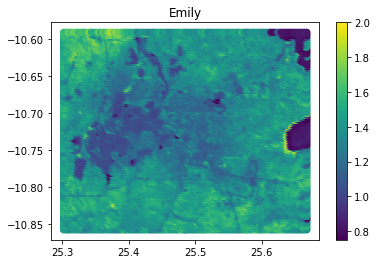

max b6/b5: 1.9249586216746593
min b6/b6: 0.9614770592962808
mean b6/b5: 1.1877125978692402
1.3007249917007742
1.0858894038129498


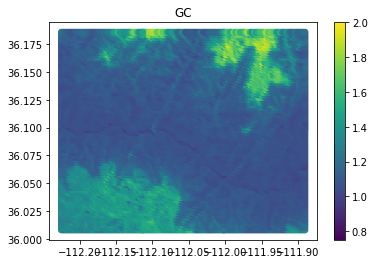

In [150]:
plot_scores('store/emily2/compiled.csv', 'Emily')
plot_scores('GEE_Mines/results/compiled.csv', 'GC')

max b6/b5: 3.2727746891891387
min b6/b6: 0.9029029859590552
mean b6/b5: 2.1242855170049237
0.31761945105624223
0.07374649370744937


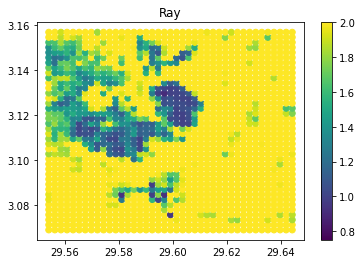

max b6/b5: 2.1699873311864804
min b6/b6: 0.4587914722941869
mean b6/b5: 1.340028106320975
0.447645609299931
0.005657399542817327


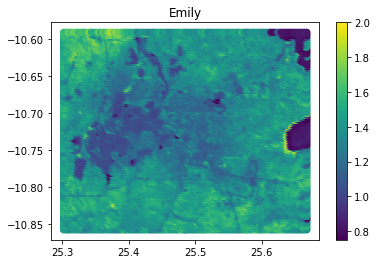

max b6/b5: 2.0622430650068684
min b6/b6: 0.7554302544781545
mean b6/b5: 1.6471026339623036
0.42087150126557427
0.09733230131818639


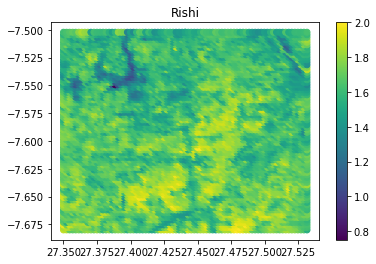

max b6/b5: 1.4426085185852437
min b6/b6: 0.7880604488574174
mean b6/b5: 1.1609327165610273
0.5991257367396879
0.10118242229057028


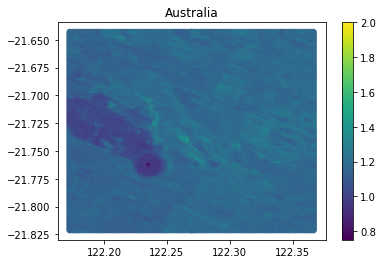

max b6/b5: 1.128715222762944
min b6/b6: 0.985164976417907
mean b6/b5: 1.042048870875981
0.3363914060437522
0.06829497727640131


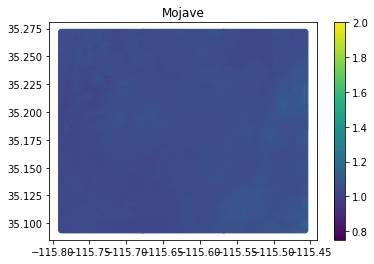

In [159]:
plot_scores('store/ray/compiled.csv', 'Ray')
plot_scores('store/emily/compiled.csv', 'Emily')
plot_scores('store/rishi/compiled.csv', 'Rishi')
plot_scores('store/aus/compiled.csv', 'Australia')
plot_scores('store/mojave/compiled.csv', 'Mojave')


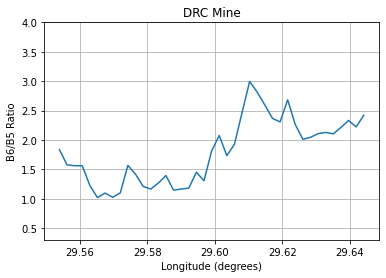

In [178]:
plot_simple('store/ray/compiled.csv', 'DRC Mine')
#plot_simple('store/emily/compiled.csv', 'Emily')
#plot_simple('store/rishi/compiled.csv', 'Rishi')
#plot_simple('store/aus/compiled.csv', 'Australia')
# plot_simple('store/mojave/compiled.csv', 'Mojave Desert')
# plot_simple('GEE_Mines/results/compiled.csv', 'Grand Canyon')

In [170]:
import ee
import geemap
ee.Initialize()

csv_converted = csv_to_list('GEE_Mines/results/compiled.csv')
grid = list_to_2d(csv_converted)

fc = []
for row in csv_converted:
    g = ee.Geometry.Polygon([[[row[0], row[3]],
                              [row[0], row[1]],
                              [row[2], row[1]],
                              [row[2], row[3]]]])
    fc.append(g)
    
fc2 = []
for e in grid[1:2]:
    for row in e:
        g = ee.Geometry.Polygon([[[row[0], row[3]],
                                  [row[0], row[1]],
                                  [row[2], row[1]],
                                  [row[2], row[3]]]])
        fc2.append(g)
                             
Map = geemap.Map()
Map.centerObject(fc[0], 12)
Map.addLayer(ee.FeatureCollection(fc), {'color': 'red'}, '???', opacity=0.2)
Map.addLayer(ee.FeatureCollection(fc2), {'color': 'blue'}, '??????')
Map

Map(center=[36.186875405290735, -112.223606309645], controls=(WidgetControl(options=['position', 'transparent_…